### Ciência dos dados [Projeto 3]: PNADC - Uso dos microdados de 2023
### Profa Orientadora: Maria Kelly Venezuela
### Grupo 8:
    - Guilherme Mitsuo Yabushita Nakama
    - Lina Furukawa Queiros
    - Lucca de Magalhães Castro Fernandes
    - Maria Clara Hirano
___

In [44]:
import os
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [45]:
pnad23_2_all = pd.read_csv('../pnad23_2.csv', sep=';')
pnad23_2_all

,Unnamed: 0,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,0,2023,2,11,11.0,NaN,110000016,1110011,1,10,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
1,1,2023,2,11,11.0,NaN,110000016,1110011,1,10,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
2,2,2023,2,11,11.0,NaN,110000016,1110011,2,10,...,217.964623,98.704681,108.979781,230.958261,0.000000,0.000000,248.378245,0.000000,0.0,111.051514
3,3,2023,2,11,11.0,NaN,110000016,1110011,3,10,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
4,4,2023,2,11,11.0,NaN,110000016,1110011,3,10,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,474570,2023,2,53,53.0,NaN,530060880,5310111,13,11,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474571,474571,2023,2,53,53.0,NaN,530060880,5310111,13,11,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474572,474572,2023,2,53,53.0,NaN,530060880,5310111,14,11,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000
474573,474573,2023,2,53,53.0,NaN,530060880,5310111,14,11,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000


In [46]:
# Colunas selecionadas:
colunas = ['Ano',
           'Trimestre',
           'UF',    # Estado
           'V1022', # Situação do domicílio
           'V2007', # Sexo
           'V2009', # Idade
           'V2010', # Cor ou raça
           'VD3004', # Nível de instrução mais elevado alcançado
           'VD4002', # Condição na ocupação do trabalho principal
           'VD4007', # Posição na ocupação do trabalho principal
           'VD4020',] # Rendimento bruto mensal de todos os trabalhos

# Leitura da base de dados filtrando apenas as colunas contidas na lista 'colunas'
pnad23_2_small = pd.read_csv('../pnad23_2.csv', sep=';', usecols=colunas)

# Renomeando as colunas para facilitar a compreensão
pnad23_2_small.rename(columns={'V1022':'Area',
                               'V2007':'Sexo',
                               'V2009':'Idade',
                               'V2010':'Cor_Raca',
                               'VD3004':'Escolaridade',
                               'VD4002':'Ocupacao',
                               'VD4007':'Trabalho',
                               'VD4020':'Renda'}, inplace=True)
pnad23_2_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Ocupacao,Trabalho,Renda
0,2023,2,11,1,1,30,4,5.0,1.0,3.0,5000.0
1,2023,2,11,1,2,29,4,5.0,NaN,NaN,NaN
2,2023,2,11,1,2,50,4,7.0,1.0,1.0,3500.0
3,2023,2,11,1,2,25,4,5.0,NaN,NaN,NaN
4,2023,2,11,1,2,2,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
474570,2023,2,53,1,1,38,1,7.0,1.0,1.0,10000.0
474571,2023,2,53,1,2,30,1,7.0,1.0,1.0,2500.0
474572,2023,2,53,1,1,51,1,7.0,1.0,1.0,4000.0
474573,2023,2,53,1,2,56,1,7.0,1.0,1.0,5000.0


In [47]:
pnad23_2_small.UF = pnad23_2_small.UF.astype('category')
pnad23_2_small.UF = pnad23_2_small.UF.cat.rename_categories({11:'Rondônia',
                                                             12:'Acre',
                                                             13:'Amazonas',
                                                             14:'Roraima',
                                                             15:'Pará',
                                                             16:'Amapá',
                                                             17:'Tocantins', 
                                                             21:'Maranhão',
                                                             22:'Piauí',
                                                             23:'Ceará',
                                                             24:'Rio Grande do Norte',
                                                             25:'Paraíba',
                                                             26:'Pernambuco',
                                                             27:'Alagoas',
                                                             28:'Sergipe',
                                                             29:'Bahia',
                                                             31:'Minas Gerais',
                                                             32:'Espírito Santo',
                                                             33:'Rio de Janeiro',
                                                             35:'São Paulo',
                                                             41:'Paraná',
                                                             42:'Santa Catarina',
                                                             43:'Rio Grande do Sul',
                                                             50:'Mato Grosso do Sul',
                                                             51:'Mato Grosso',
                                                             52:'Goiás',
                                                             53:'Distrito Federal',})
pnad23_2_small.UF.value_counts(True).round(3)*100

UF
São Paulo              7.8
Minas Gerais           7.4
Rio de Janeiro         7.1
Maranhão               6.5
Santa Catarina         6.4
Paraná                 5.3
Rio Grande do Sul      5.3
Bahia                  4.8
Ceará                  4.7
Alagoas                4.2
Pernambuco             4.1
Pará                   3.7
Espírito Santo         3.6
Goiás                  3.3
Amazonas               3.0
Mato Grosso            2.7
Paraíba                2.6
Piauí                  2.3
Mato Grosso do Sul     2.2
Rio Grande do Norte    2.0
Acre                   2.0
Distrito Federal       1.9
Sergipe                1.9
Rondônia               1.7
Tocantins              1.5
Roraima                1.2
Amapá                  0.9
Name: proportion, dtype: float64

In [48]:
pnad23_2_small.Area = pnad23_2_small.Area.astype('category')
pnad23_2_small.Area = pnad23_2_small.Area.cat.rename_categories({1:'Urbana',
                                                                 2:'Rural'})
pnad23_2_small.Area.value_counts(True).round(3)*100

Area
Urbana    73.4
Rural     26.6
Name: proportion, dtype: float64

In [49]:
pnad23_2_small.Sexo = pnad23_2_small.Sexo.astype('category')
pnad23_2_small.Sexo = pnad23_2_small.Sexo.cat.rename_categories({1:'Homem',
                                                                 2:'Mulher'})
pnad23_2_small.Sexo.value_counts(True).round(3)*100

Sexo
Mulher    51.6
Homem     48.4
Name: proportion, dtype: float64

In [50]:
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.astype('category')
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.cat.rename_categories({1:'Branca',
                                                                         2:'Preta',
                                                                         3:'Amarela',
                                                                         4:'Parda',
                                                                         5:'Indígena',
                                                                         9:'Ignorado'})
pnad23_2_small.Cor_Raca.value_counts(True).round(3)*100

Cor_Raca
Parda       49.8
Branca      39.4
Preta        9.7
Amarela      0.6
Indígena     0.6
Ignorado     0.0
Name: proportion, dtype: float64

In [51]:
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.astype('category')
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.cat.rename_categories({1:'Sem Instrução e menos de 1 ano de estudo',
                                                                                 2:'Fundamental incompleto ou equivalente',
                                                                                 3:'Fundamental completo ou equivalente',
                                                                                 4:'Médio incompleto ou equivalente',
                                                                                 5:'Médio completo ou equivalente',
                                                                                 6:'Superior incompleto ou equivalente',
                                                                                 7:'Superior completo',
                                                                                 '':'Não aplicável'})
pnad23_2_small.Escolaridade.value_counts(True).round(3)*100

Escolaridade
Fundamental incompleto ou equivalente       35.9
Médio completo ou equivalente               24.2
Superior completo                           12.2
Sem Instrução e menos de 1 ano de estudo     9.3
Fundamental completo ou equivalente          7.6
Médio incompleto ou equivalente              6.9
Superior incompleto ou equivalente           3.9
Name: proportion, dtype: float64

In [52]:
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.astype('category')
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.cat.rename_categories({1:'Empregado',
                                                                         2:'Empregador',
                                                                         3:'Conta própria',
                                                                         4:'Trabalhador familiar auxiliar',
                                                                         '':'Não aplicável',})
pnad23_2_small.Trabalho.value_counts(True).round(3)*100

Trabalho
Empregado                        65.2
Conta própria                    28.2
Empregador                        4.0
Trabalhador familiar auxiliar     2.6
Name: proportion, dtype: float64

In [53]:
pnad23_2_small.Ocupacao = pnad23_2_small.Ocupacao.astype('category')
pnad23_2_small.Ocupacao = pnad23_2_small.Ocupacao.cat.rename_categories({1:'Ocupado',
                                                                         2:'Desocupado',})
pnad23_2_small.Ocupacao.value_counts(True).round(3)*100

Ocupacao
Ocupado       92.5
Desocupado     7.5
Name: proportion, dtype: float64

In [54]:
siglas_UF = {'Rondônia':'RO',
             'Acre':'AC',
             'Amazonas':'AM',
             'Roraima':'RR',
             'Pará':'PA',
             'Amapá':'AP',
             'Tocantins':'TO', 
             'Maranhão':'MA',
             'Piauí':'PI',
             'Ceará':'CE',
             'Rio Grande do Norte':'RN',
             'Paraíba':'PB',
             'Pernambuco':'PE',
             'Alagoas':'AL',
             'Sergipe':'SE',
             'Bahia':'BA',
             'Minas Gerais':'MG',
             'Espírito Santo':'ES',
             'Rio de Janeiro':'RJ',
             'São Paulo':'SP',
             'Paraná':'PR',
             'Santa Catarina':'SC',
             'Rio Grande do Sul':'RS',
             'Mato Grosso do Sul':'MS',
             'Mato Grosso':'MT',
             'Goiás':'GO',
             'Distrito Federal':'DF'}
pnad23_2_small.UF = pnad23_2_small.UF.map(siglas_UF)


siglas_escolaridade = {'Sem Instrução e menos de 1 ano de estudo':'Menos de 1 ano de estudo',
                       'Fundamental incompleto ou equivalente':'EF incompleto',
                       'Fundamental completo ou equivalente':'EF completo',
                       'Médio incompleto ou equivalente':'EM incompleto',
                       'Médio completo ou equivalente':'EM completo',
                       'Superior incompleto ou equivalente':'Superior incompleto',
                       'Superior completo':'Superior completo',
                       'Não aplicável':'NA'}
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.map(siglas_escolaridade)

In [55]:
pessoas_ocupadas = pnad23_2_small.loc[pnad23_2_small['Ocupacao'] == 'Ocupado']
empregados = pnad23_2_small.loc[pnad23_2_small['Trabalho'] == 'Empregado']

In [182]:
# Salvando a base de dados small em CSV para reduzir o tempo de processamento
empregados.to_csv("../P3_small.csv", sep=';', index=False)
dados_small = pd.read_csv("../P3_small.csv", sep=';')
dados_small = dados_small.loc[dados_small['Renda'] <= 20000]

<Figure size 1000x600 with 0 Axes>

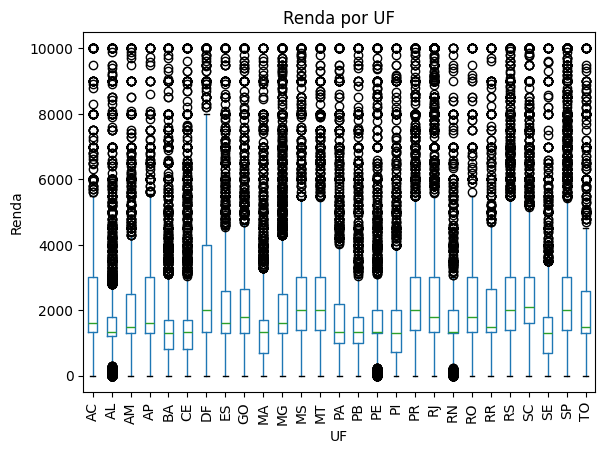

<Figure size 1000x600 with 0 Axes>

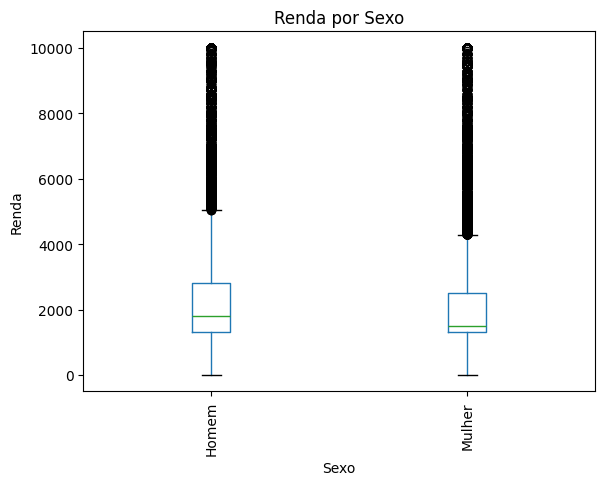

<Figure size 1000x600 with 0 Axes>

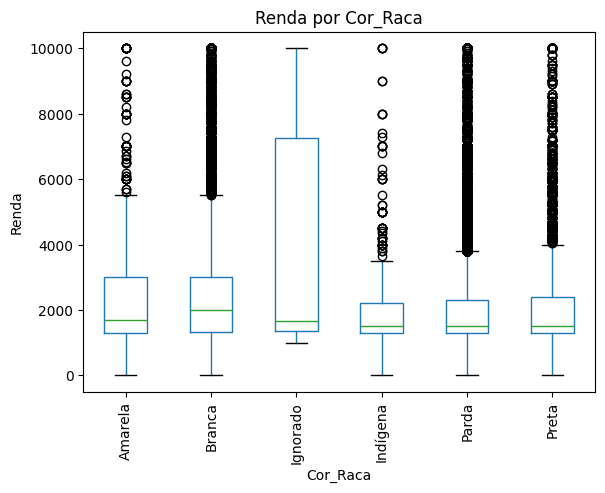

<Figure size 1000x600 with 0 Axes>

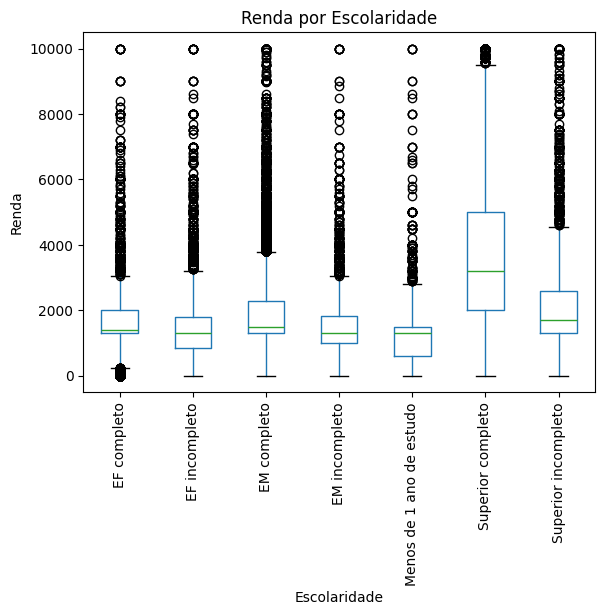

<Figure size 1000x600 with 0 Axes>

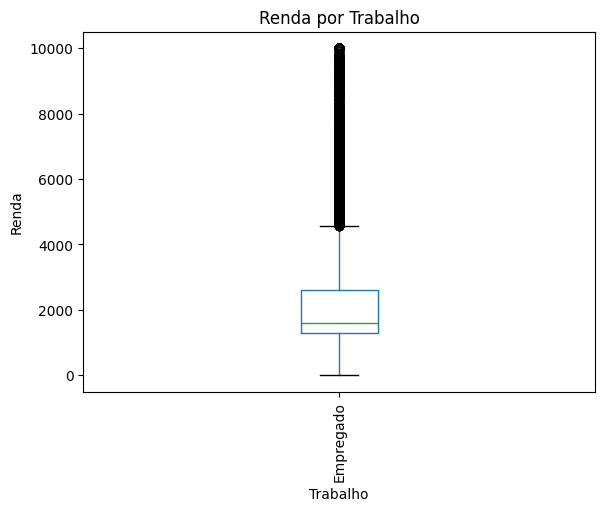

<Figure size 1000x600 with 0 Axes>

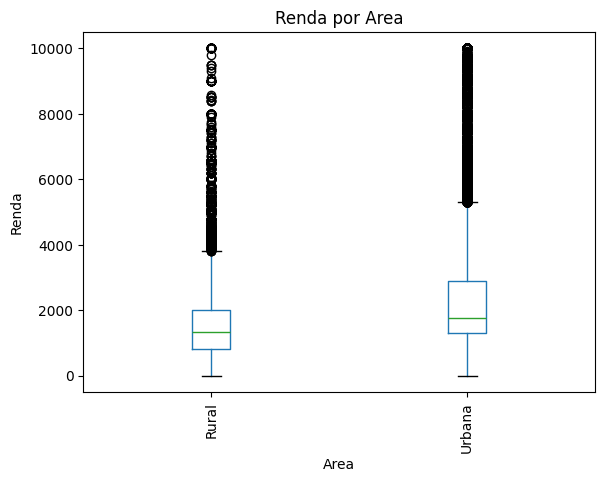

In [183]:
# Definição da função auxiliar para boxplots com limitação de faixa de renda
def boxplot_renda_por_variavel(df, variavel, limite):
    plt.figure(figsize=(10,6))

    # Filtra os dados para excluir valores acima do limite superior
    df_filtrado = df[df.Renda <= limite]

    df_filtrado.boxplot(column='Renda', by=variavel, grid=False)
    plt.title(f'Renda por {variavel}')
    plt.suptitle('')
    plt.xlabel(variavel)
    plt.xticks(rotation=90)  # Rotacionar rótulos para melhor visualização
    plt.ylabel('Renda')
    plt.show()

# Encontrando o limite superior baseado em um percentil da renda
limite_97 = dados_small.Renda.quantile(0.97)

# Chamar a função para cada variável categórica com o limite superior definido
variaveis = ['UF','Sexo', 'Cor_Raca', 'Escolaridade', 'Trabalho', 'Area']
for variavel in variaveis:
    boxplot_renda_por_variavel(dados_small, variavel, limite_97)

In [184]:
dados_small.describe()

,Ano,Trimestre,Idade,Renda
count,131291.0,131291.0,131291.00000,131291.000000
mean,2023.0,2.0,38.61724,2496.667433
std,0.0,0.0,12.84789,2556.427010
min,2023.0,2.0,14.00000,0.000000
25%,2023.0,2.0,28.00000,1302.000000
50%,2023.0,2.0,38.00000,1650.000000
75%,2023.0,2.0,48.00000,2800.000000
max,2023.0,2.0,103.00000,20000.000000


In [185]:
dados_small.isnull().sum()

Ano             0
Trimestre       0
UF              0
Area            0
Sexo            0
Idade           0
Cor_Raca        0
Escolaridade    0
Ocupacao        0
Trabalho        0
Renda           0
dtype: int64

In [186]:
dummies_UF = pd.get_dummies(dados_small['UF'],drop_first=True,dtype='int64')
dummies_UF

,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132337,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132338,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132339,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132340,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
dummies_Sexo = pd.get_dummies(dados_small['Sexo'],drop_first=True,dtype='int64')

In [188]:
dummies_Cor_Raca = pd.get_dummies(dados_small['Cor_Raca'],drop_first=True,dtype='int64')

In [189]:
dummies_Escolaridade = pd.get_dummies(dados_small['Escolaridade'],drop_first=True,dtype='int64')

In [190]:
dummies_Area = pd.get_dummies(dados_small['Area'],drop_first=True,dtype='int64')

In [191]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [192]:
dados_small_dummies = pd.concat([dados_small, dummies_UF, dummies_Sexo, dummies_Cor_Raca, dummies_Escolaridade, dummies_Area], axis=1)
dados_small_dummies.columns

Index(['Ano', 'Trimestre', 'UF', 'Area', 'Sexo', 'Idade', 'Cor_Raca',
       'Escolaridade', 'Ocupacao', 'Trabalho', 'Renda', 'AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana'],
      dtype='object')

In [193]:
df = dados_small_dummies[['Ano', 'Trimestre', 'UF', 'Area', 'Sexo', 'Idade', 'Cor_Raca',
       'Escolaridade', 'Ocupacao', 'Trabalho', 'Renda', 'AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]

df.describe()

,Ano,Trimestre,Idade,Renda,AL,AM,AP,BA,CE,DF,...,Indígena,Parda,Preta,EF incompleto,EM completo,EM incompleto,Menos de 1 ano de estudo,Superior completo,Superior incompleto,Urbana
count,131291.0,131291.0,131291.00000,131291.000000,131291.000000,131291.000000,131291.000000,131291.000000,131291.000000,131291.000000,...,131291.000000,131291.000000,131291.000000,131291.000000,131291.000000,131291.000000,131291.000000,131291.000000,131291.000000,131291.000000
mean,2023.0,2.0,38.61724,2496.667433,0.034245,0.022370,0.008394,0.040863,0.039416,0.024488,...,0.004501,0.472797,0.114593,0.181795,0.359591,0.068771,0.022606,0.232476,0.065960,0.823362
std,0.0,0.0,12.84789,2556.427010,0.181857,0.147885,0.091231,0.197975,0.194584,0.154558,...,0.066942,0.499261,0.318531,0.385677,0.479882,0.253065,0.148645,0.422412,0.248214,0.381364
min,2023.0,2.0,14.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,2.0,28.00000,1302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2023.0,2.0,38.00000,1650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2023.0,2.0,48.00000,2800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2023.0,2.0,103.00000,20000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [194]:
df.isnull().sum()
df = df.dropna()

In [195]:
X = df[['AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     1570.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:29   Log-Likelihood:            -1.1913e+06
No. Observations:              131291   AIC:                         2.383e+06
Df Residuals:                  131251   BIC:                         2.383e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1755.2330     91.836     19.113      0.000    1575.235    1935.231
AL                        -349.1850     57.220     -6.103      0.000    -461.335    -237.035
AM                        -229.3453     61.657     -3.720      0.000    -350.191    -108.499
AP                          51.4063     79.534      0.646      0.518    -104.480     207.292
BA                        -332.9206     55.935     -5.952      0.000    -442.552    -223.290
CE                        -492.2500     56.054     -8.782      0.000    -602.116    -382.384
DF                        1081.8102     60.633     17.842      0.000     962.971    1200.649
ES                         103.2221     56.169      1.838      0.066      -6.867     213.311
GO                         161.8545     56.038      2.888      0.004      52.022     271.687
MA                        -482.3383     55.183     -8.741      0.000    -590.496    -374.181
MG                          65.7556     51.924      1.266      0.205     -36.015     167.526
MS                         351.2992     59.427      5.911      0.000     234.823     467.775
MT                         490.8434     58.002      8.463      0.000     377.161     604.525
PA                         -94.5448     58.043     -1.629      0.103    -208.308      19.218
PB                        -214.6086     62.175     -3.452      0.001    -336.471     -92.746
PE                        -299.7215     58.194     -5.150      0.000    -413.780    -185.663
PI                        -380.7516     63.957     -5.953      0.000    -506.106    -255.397
PR                         213.9618     53.509      3.999      0.000     109.085     318.838
RJ                         478.2313     52.391      9.128      0.000     375.546     580.916
RN                        -305.6965     65.008     -4.702      0.000    -433.111    -178.282
RO                         156.6727     69.090      2.268      0.023      21.257     292.088
RR                         122.1841     71.456      1.710      0.087     -17.867     262.236
RS                         347.1393     54.135      6.412      0.000     241.035     453.243
SC                         365.4560     52.749      6.928      0.000     262.070     468.842
SE                        -275.6679     65.373     -4.217      0.000    -403.798    -147.537
SP                         290.4966     51.568      5.633      0.000     189.424     391.569
TO                         -46.1279     64.969     -0.710      0.478    -173.466      81.210
Mulher                    -844.6297     11.938    -70.750      0.000    -868.028    -821.231
Branca                      62.6253     75.213      0.833      0.405     -84.791     210.042
Ignorado                  1912.7935    641.111      2.984      0.003     656.228    3169.359
Indígena      

In [196]:
X = df[['Mulher','AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results1 = regress(Y,X)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     1569.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:29   Log-Likelihood:            -1.1913e+06
No. Observations:              131291   AIC:                         2.383e+06
Df Residuals:                  131251   BIC:                         2.383e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1813.6549     55.545     32.652      0.000    1704.787    1922.522
Mulher                    1.238e+13   2.56e+13      0.483      0.629   -3.78e+13    6.26e+13
AL                        -348.7883     57.218     -6.096      0.000    -460.935    -236.642
AM                        -228.8763     61.654     -3.712      0.000    -349.718    -108.035
AP                          51.5556     79.535      0.648      0.517    -104.331     207.442
BA                        -332.5735     55.933     -5.946      0.000    -442.202    -222.945
CE                        -491.8361     56.052     -8.775      0.000    -601.698    -381.974
DF                        1082.2702     60.630     17.850      0.000     963.436    1201.105
ES                         103.9601     56.162      1.851      0.064      -6.116     214.036
GO                         162.2301     56.036      2.895      0.004      52.400     272.060
MA                        -482.1837     55.183     -8.738      0.000    -590.341    -374.026
MG                          66.5031     51.917      1.281      0.200     -35.253     168.259
MS                         351.6011     59.426      5.917      0.000     235.127     468.075
MT                         491.2719     58.000      8.470      0.000     377.594     604.950
PA                         -94.0830     58.040     -1.621      0.105    -207.841      19.675
PB                        -214.2588     62.174     -3.446      0.001    -336.119     -92.398
PE                        -299.2873     58.192     -5.143      0.000    -413.342    -185.233
PI                        -380.1583     63.953     -5.944      0.000    -505.506    -254.811
PR                         214.6994     53.502      4.013      0.000     109.837     319.562
RJ                         478.7897     52.387      9.140      0.000     376.113     581.466
RN                        -304.8712     65.001     -4.690      0.000    -432.272    -177.471
RO                         157.7990     69.097      2.284      0.022      22.370     293.228
RR                         122.6271     71.454      1.716      0.086     -17.421     262.675
RS                         348.3632     54.115      6.437      0.000     242.299     454.428
SC                         366.5355     52.732      6.951      0.000     263.181     469.890
SE                        -275.4030     65.373     -4.213      0.000    -403.533    -147.274
SP                         290.7370     51.568      5.638      0.000     189.666     391.809
TO                         -45.8939     64.969     -0.706      0.480    -173.232      81.444
Mulher                   -1.238e+13   2.56e+13     -0.483      0.629   -6.26e+13    3.78e+13
Ignorado                  1851.2669    636.842      2.907      0.004     603.068    3099.466
Indígena      

In [197]:
X = df[['Mulher','AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results2 = regress(Y,X)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     1611.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:30   Log-Likelihood:            -1.1913e+06
No. Observations:              131291   AIC:                         2.383e+06
Df Residuals:                  131252   BIC:                         2.383e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1832.0588     47.738     38.378      0.000    1738.494    1925.624
Mulher                    1.238e+13   2.56e+13      0.483      0.629   -3.78e+13    6.26e+13
AL                        -367.3296     49.557     -7.412      0.000    -464.460    -270.199
AM                        -247.4337     54.602     -4.532      0.000    -354.453    -140.414
BA                        -351.1187     48.063     -7.305      0.000    -445.321    -256.917
CE                        -510.3725     48.204    -10.588      0.000    -604.852    -415.893
DF                        1063.6768     53.416     19.913      0.000     958.982    1168.371
ES                          85.3959     48.311      1.768      0.077      -9.292     180.084
GO                         143.6760     48.173      2.983      0.003      49.258     238.094
MA                        -500.7099     47.202    -10.608      0.000    -593.224    -408.195
MG                          47.9548     43.316      1.107      0.268     -36.943     132.853
MS                         333.0460     52.077      6.395      0.000     230.976     435.116
MT                         472.7070     50.437      9.372      0.000     373.852     571.562
PA                        -112.6202     50.502     -2.230      0.026    -211.602     -13.638
PB                        -232.8044     55.204     -4.217      0.000    -341.003    -124.605
PE                        -317.8320     50.672     -6.272      0.000    -417.148    -218.516
PI                        -398.7037     57.201     -6.970      0.000    -510.817    -286.590
PR                         196.1437     45.200      4.340      0.000     107.553     284.734
RJ                         460.2058     43.841     10.497      0.000     374.277     546.134
RN                        -323.4101     58.363     -5.541      0.000    -437.801    -209.019
RO                         139.2519     62.892      2.214      0.027      15.985     262.519
RR                         104.0652     65.466      1.590      0.112     -24.247     232.377
RS                         329.7996     45.917      7.183      0.000     239.803     419.796
SC                         347.9806     44.283      7.858      0.000     261.187     434.774
SE                        -293.9380     58.786     -5.000      0.000    -409.158    -178.718
SP                         272.1758     42.885      6.347      0.000     188.121     356.230
TO                         -64.4525     58.323     -1.105      0.269    -178.766      49.860
Mulher                   -1.238e+13   2.56e+13     -0.483      0.629   -6.26e+13    3.78e+13
Ignorado                  1851.1974    636.840      2.907      0.004     603.002    3099.393
Indígena                  -319.9627     87.786     -3.645      0.000    -492.023    -147.903
Parda         

In [198]:
X = df[['Mulher','AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP',  'Mulher',
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results3 = regress(Y,X)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     1654.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:31   Log-Likelihood:            -1.1913e+06
No. Observations:              131291   AIC:                         2.383e+06
Df Residuals:                  131253   BIC:                         2.383e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1803.8826     40.358     44.697      0.000    1724.781    1882.984
Mulher                    1.238e+13   2.56e+13      0.484      0.629   -3.78e+13    6.26e+13
AL                        -339.6369     42.756     -7.944      0.000    -423.438    -255.835
AM                        -219.8504     48.564     -4.527      0.000    -315.034    -124.667
BA                        -323.3560     40.975     -7.892      0.000    -403.666    -243.046
CE                        -482.7107     41.194    -11.718      0.000    -563.450    -401.972
DF                        1091.2815     47.214     23.113      0.000     998.742    1183.821
ES                         113.0777     41.310      2.737      0.006      32.111     194.045
GO                         171.3508     41.152      4.164      0.000      90.694     252.008
MA                        -472.9773     39.978    -11.831      0.000    -551.334    -394.621
MG                          75.6645     35.319      2.142      0.032       6.439     144.890
MS                         360.7281     45.659      7.901      0.000     271.238     450.218
MT                         500.3800     43.782     11.429      0.000     414.568     586.192
PA                         -84.9361     43.847     -1.937      0.053    -170.876       1.003
PB                        -205.1135     49.191     -4.170      0.000    -301.528    -108.699
PE                        -290.1565     44.051     -6.587      0.000    -376.496    -203.817
PI                        -371.0091     51.419     -7.215      0.000    -471.790    -270.228
PR                         223.8371     37.616      5.951      0.000     150.110     297.564
RJ                         487.8683     35.993     13.555      0.000     417.323     558.414
RN                        -295.7276     52.714     -5.610      0.000    -399.046    -192.410
RO                         166.9143     57.694      2.893      0.004      53.835     279.994
RR                         131.6923     60.507      2.176      0.030      13.100     250.284
RS                         357.5354     38.451      9.298      0.000     282.171     432.899
SC                         375.6932     36.498     10.294      0.000     304.158     447.228
SE                        -266.2046     53.161     -5.007      0.000    -370.400    -162.009
SP                         299.8661     34.805      8.616      0.000     231.648     368.084
Mulher                   -1.238e+13   2.56e+13     -0.484      0.629   -6.26e+13    3.78e+13
Ignorado                  1851.0572    636.840      2.907      0.004     602.862    3099.253
Indígena                  -319.8880     87.786     -3.644      0.000    -491.948    -147.828
Parda                     -355.1819     13.673    -25.977      0.000    -381.980    -328.383
Preta         

In [199]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results4 = regress(Y,X)
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:31   Log-Likelihood:            -1.1938e+06
No. Observations:              131291   AIC:                         2.388e+06
Df Residuals:                  131255   BIC:                         2.388e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1534.1535     40.551     37.832      0.000    1454.674    1613.633
AL                        -344.2103     43.564     -7.901      0.000    -429.594    -258.826
AM                        -198.0777     49.480     -4.003      0.000    -295.057    -101.098
BA                        -332.2675     41.748     -7.959      0.000    -414.094    -250.441
CE                        -486.0599     41.972    -11.581      0.000    -568.323    -403.796
DF                        1085.8634     48.106     22.572      0.000     991.577    1180.150
ES                         105.2680     42.090      2.501      0.012      22.772     187.764
GO                         174.5711     41.929      4.163      0.000      92.391     256.751
MA                        -474.9233     40.733    -11.659      0.000    -554.759    -395.087
MG                          57.8182     35.986      1.607      0.108     -12.713     128.349
MS                         360.6552     46.521      7.753      0.000     269.475     451.835
MT                         504.8336     44.609     11.317      0.000     417.401     592.266
PA                         -69.0419     44.675     -1.545      0.122    -156.603      18.519
PB                        -216.5089     50.120     -4.320      0.000    -314.744    -118.274
PE                        -294.7871     44.883     -6.568      0.000    -382.757    -206.817
PI                        -374.1703     52.390     -7.142      0.000    -476.855    -271.486
PR                         216.5021     38.327      5.649      0.000     141.383     291.621
RJ                         489.1107     36.673     13.337      0.000     417.233     560.988
RN                        -294.1387     53.709     -5.477      0.000    -399.408    -188.870
RO                         150.0209     58.771      2.553      0.011      34.830     265.212
RR                         140.7997     61.649      2.284      0.022      19.969     261.631
RS                         329.3490     39.175      8.407      0.000     252.566     406.132
SC                         356.7129     37.186      9.593      0.000     283.829     429.597
SE                        -257.5079     54.165     -4.754      0.000    -363.670    -151.345
SP                         286.8634     35.462      8.089      0.000     217.358     356.368
Ignorado                  1890.1159    648.867      2.913      0.004     618.349    3161.883
Indígena                  -339.0782     89.444     -3.791      0.000    -514.387    -163.770
Parda                     -348.8756     13.931    -25.044      0.000    -376.179    -321.572
Preta                     -398.0131     20.579    -19.341      0.000    -438.347    -357.680
EF incompleto              -75.0587     26.680     -2.813      0.005    -127.352     -22.766
EM completo   

In [200]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results5 = regress(Y,X)
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1592.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:32   Log-Likelihood:            -1.1938e+06
No. Observations:              131291   AIC:                         2.388e+06
Df Residuals:                  131256   BIC:                         2.388e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1520.4410     38.613     39.376      0.000    1444.760    1596.122
AL                   -344.5147     43.563     -7.908      0.000    -429.897    -259.132
AM                   -197.5384     49.477     -3.992      0.000    -294.513    -100.564
BA                   -332.8154     41.746     -7.972      0.000    -414.636    -250.995
CE                   -486.2438     41.971    -11.585      0.000    -568.507    -403.981
DF                   1086.4765     48.103     22.587      0.000     992.196    1180.757
ES                    105.8556     42.087      2.515      0.012      23.366     188.345
GO                    175.1102     41.926      4.177      0.000      92.935     257.285
MA                   -474.8626     40.733    -11.658      0.000    -554.699    -395.027
MG                     58.6560     35.978      1.630      0.103     -11.859     129.172
MS                    361.3539     46.517      7.768      0.000     270.182     452.525
MT                    505.2469     44.607     11.327      0.000     417.817     592.677
PA                    -68.4970     44.672     -1.533      0.125    -156.053      19.059
PB                   -216.8910     50.119     -4.328      0.000    -315.123    -118.659
PE                   -294.8432     44.883     -6.569      0.000    -382.814    -206.873
PI                   -373.8787     52.390     -7.136      0.000    -476.562    -271.195
PR                    217.1888     38.322      5.668      0.000     142.079     292.298
RJ                    489.7670     36.668     13.357      0.000     417.899     561.635
RN                   -293.8465     53.709     -5.471      0.000    -399.114    -188.579
RO                    150.3887     58.770      2.559      0.011      35.200     265.578
RR                    141.1331     61.648      2.289      0.022      20.303     261.963
RS                    330.7123     39.156      8.446      0.000     253.967     407.458
SC                    357.7658     37.174      9.624      0.000     284.905     430.626
SE                   -257.7017     54.165     -4.758      0.000    -363.864    -151.540
SP                    287.6238     35.455      8.112      0.000     218.132     357.116
Ignorado             1882.9590    648.835      2.902      0.004     611.254    3154.664
Indígena             -339.4077     89.443     -3.795      0.000    -514.715    -164.100
Parda                -348.9388     13.931    -25.048      0.000    -376.242    -321.635
Preta                -398.4536     20.575    -19.366      0.000    -438.780    -358.128
EF incompleto         -62.4318     24.119     -2.588      0.010    -109.705     -15.159
EM completo           319.3907     22.142     14.425      0.000     275.993     362.788
EM incompleto         -94.9343     30.008     -3.164      0.002    -153.749     -36.120
Sup

In [201]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT',  'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results6 = regress(Y,X)
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1640.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:32   Log-Likelihood:            -1.1938e+06
No. Observations:              131291   AIC:                         2.388e+06
Df Residuals:                  131257   BIC:                         2.388e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1490.4061     33.276     44.789      0.000    1425.186    1555.626
AL                   -314.7570     39.001     -8.070      0.000    -391.199    -238.315
AM                   -167.9288     45.554     -3.686      0.000    -257.213     -78.644
BA                   -302.9978     36.940     -8.202      0.000    -375.399    -230.596
CE                   -456.5079     37.223    -12.264      0.000    -529.464    -383.552
DF                   1116.0059     44.080     25.318      0.000    1029.611    1202.401
ES                    135.5416     37.370      3.627      0.000      62.298     208.785
GO                    204.8233     37.180      5.509      0.000     131.952     277.695
MA                   -445.0504     35.794    -12.434      0.000    -515.205    -374.896
MG                     88.3956     30.302      2.917      0.004      29.004     147.787
MS                    391.0460     42.295      9.246      0.000     308.149     473.943
MT                    534.9433     40.184     13.312      0.000     456.184     613.703
PB                   -187.1409     46.211     -4.050      0.000    -277.714     -96.567
PE                   -265.1175     40.481     -6.549      0.000    -344.459    -185.776
PI                   -344.1280     48.665     -7.071      0.000    -439.510    -248.746
PR                    246.8825     33.069      7.466      0.000     182.069     311.696
RJ                    519.3732     31.173     16.661      0.000     458.276     580.471
RN                   -264.1157     50.087     -5.273      0.000    -362.285    -165.947
RO                    180.0982     55.485      3.246      0.001      71.349     288.848
RR                    170.7654     58.541      2.917      0.004      56.025     285.506
RS                    360.4088     34.031     10.591      0.000     293.708     427.109
SC                    387.4492     31.736     12.209      0.000     325.248     449.651
SE                   -227.8973     50.557     -4.508      0.000    -326.989    -128.806
SP                    317.2970     29.709     10.680      0.000     259.069     375.525
Ignorado             1882.7714    648.838      2.902      0.004     611.060    3154.483
Indígena             -338.7575     89.443     -3.787      0.000    -514.064    -163.451
Parda                -348.9167     13.931    -25.047      0.000    -376.220    -321.613
Preta                -398.4358     20.575    -19.365      0.000    -438.762    -358.110
EF incompleto         -62.8394     24.118     -2.606      0.009    -110.110     -15.569
EM completo           319.2281     22.142     14.418      0.000     275.831     362.625
EM incompleto         -95.3193     30.007     -3.177      0.001    -154.132     -36.507
Superior completo    3055.8329     23.634    129.299      0.000    3009.511    3102.155
Sup

In [202]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT',  'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 
       'EM completo', 'EM incompleto', 
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results7 = regress(Y,X)
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1691.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:33   Log-Likelihood:            -1.1938e+06
No. Observations:              131291   AIC:                         2.388e+06
Df Residuals:                  131258   BIC:                         2.388e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1447.7212     28.964     49.983      0.000    1390.951    1504.491
AL                   -314.9527     39.002     -8.075      0.000    -391.396    -238.509
AM                   -168.0946     45.555     -3.690      0.000    -257.381     -78.808
BA                   -303.1833     36.941     -8.207      0.000    -375.586    -230.781
CE                   -456.2362     37.223    -12.257      0.000    -529.193    -383.279
DF                   1115.5182     44.080     25.307      0.000    1029.122    1201.915
ES                    134.7534     37.369      3.606      0.000      61.510     207.996
GO                    204.2256     37.180      5.493      0.000     131.354     277.097
MA                   -444.1623     35.793    -12.409      0.000    -514.315    -374.009
MG                     87.4230     30.300      2.885      0.004      28.035     146.811
MS                    389.7740     42.293      9.216      0.000     306.881     472.667
MT                    535.1933     40.185     13.318      0.000     456.432     613.955
PB                   -187.8796     46.212     -4.066      0.000    -278.453     -97.306
PE                   -265.9140     40.481     -6.569      0.000    -345.255    -186.573
PI                   -344.6587     48.665     -7.082      0.000    -440.042    -249.275
PR                    246.9132     33.069      7.467      0.000     182.098     311.729
RJ                    519.3887     31.173     16.661      0.000     458.290     580.488
RN                   -264.5252     50.088     -5.281      0.000    -362.696    -166.354
RO                    180.1630     55.486      3.247      0.001      71.411     288.915
RR                    171.0859     58.543      2.922      0.003      56.344     285.828
RS                    360.4701     34.032     10.592      0.000     293.768     427.172
SC                    388.5878     31.733     12.245      0.000     326.391     450.785
SE                   -229.5755     50.554     -4.541      0.000    -328.661    -130.490
SP                    317.1676     29.709     10.676      0.000     258.938     375.397
Ignorado             1890.0995    648.847      2.913      0.004     618.372    3161.827
Indígena             -339.1254     89.445     -3.791      0.000    -514.435    -163.815
Parda                -349.1936     13.931    -25.067      0.000    -376.497    -321.890
Preta                -398.7164     20.575    -19.379      0.000    -439.043    -358.390
EM completo           360.6668     15.405     23.412      0.000     330.473     390.860
EM incompleto         -53.7398     25.412     -2.115      0.034    -103.547      -3.933
Superior completo    3097.1003     17.542    176.555      0.000    3062.719    3131.482
Superior incompleto   609.7036     26.178     23.290      0.000     558.395     661.012
Urb

In [203]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT',  'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 
       'EM completo', 
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results8 = regress(Y,X)
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1746.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:33   Log-Likelihood:            -1.1938e+06
No. Observations:              131291   AIC:                         2.388e+06
Df Residuals:                  131259   BIC:                         2.388e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1438.4142     28.628     50.244      0.000    1382.303    1494.526
AL                   -314.1927     39.001     -8.056      0.000    -390.634    -237.752
AM                   -168.3119     45.555     -3.695      0.000    -257.599     -79.025
BA                   -302.8880     36.941     -8.199      0.000    -375.291    -230.485
CE                   -455.9139     37.223    -12.248      0.000    -528.871    -382.957
DF                   1115.5755     44.081     25.308      0.000    1029.178    1201.973
ES                    134.9399     37.370      3.611      0.000      61.696     208.184
GO                    203.9468     37.180      5.485      0.000     131.075     276.819
MA                   -443.8483     35.793    -12.400      0.000    -514.002    -373.695
MG                     87.5905     30.301      2.891      0.004      28.201     146.979
MS                    389.8867     42.293      9.219      0.000     306.993     472.781
MT                    533.8434     40.180     13.286      0.000     455.091     612.596
PB                   -187.0278     46.210     -4.047      0.000    -277.599     -96.456
PE                   -265.0316     40.479     -6.547      0.000    -344.370    -185.694
PI                   -344.0302     48.665     -7.069      0.000    -439.413    -248.647
PR                    246.9217     33.070      7.467      0.000     182.105     311.738
RJ                    519.6625     31.173     16.670      0.000     458.563     580.762
RN                   -264.1464     50.088     -5.274      0.000    -362.318    -165.975
RO                    179.0982     55.485      3.228      0.001      70.350     287.847
RR                    169.9884     58.541      2.904      0.004      55.249     284.728
RS                    360.0693     34.032     10.580      0.000     293.368     426.771
SC                    388.5742     31.734     12.245      0.000     326.376     450.772
SE                   -229.0720     50.554     -4.531      0.000    -328.158    -129.986
SP                    317.1120     29.710     10.674      0.000     258.882     375.342
Ignorado             1888.8409    648.855      2.911      0.004     617.097    3160.585
Indígena             -338.7241     89.446     -3.787      0.000    -514.036    -163.412
Parda                -349.1026     13.931    -25.060      0.000    -376.406    -321.799
Preta                -398.5812     20.575    -19.372      0.000    -438.908    -358.254
EM completo           371.8655     14.466     25.705      0.000     343.512     400.219
Superior completo    3108.5028     16.693    186.217      0.000    3075.785    3141.220
Superior incompleto   621.1096     25.617     24.246      0.000     570.901     671.318
Urbana                302.3496     16.327     18.518      0.000     270.349     334.350
===

In [204]:
results_final = results8
results_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1746.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        11:14:33   Log-Likelihood:            -1.1938e+06
No. Observations:              131291   AIC:                         2.388e+06
Df Residuals:                  131259   BIC:                         2.388e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1438.4142     28.628     50.244      0.000    1382.303    1494.526
AL                   -314.1927     39.001     -8.056      0.000    -390.634    -237.752
AM                   -168.3119     45.555     -3.695      0.000    -257.599     -79.025
BA                   -302.8880     36.941     -8.199      0.000    -375.291    -230.485
CE                   -455.9139     37.223    -12.248      0.000    -528.871    -382.957
DF                   1115.5755     44.081     25.308      0.000    1029.178    1201.973
ES                    134.9399     37.370      3.611      0.000      61.696     208.184
GO                    203.9468     37.180      5.485      0.000     131.075     276.819
MA                   -443.8483     35.793    -12.400      0.000    -514.002    -373.695
MG                     87.5905     30.301      2.891      0.004      28.201     146.979
MS                    389.8867     42.293      9.219      0.000     306.993     472.781
MT                    533.8434     40.180     13.286      0.000     455.091     612.596
PB                   -187.0278     46.210     -4.047      0.000    -277.599     -96.456
PE                   -265.0316     40.479     -6.547      0.000    -344.370    -185.694
PI                   -344.0302     48.665     -7.069      0.000    -439.413    -248.647
PR                    246.9217     33.070      7.467      0.000     182.105     311.738
RJ                    519.6625     31.173     16.670      0.000     458.563     580.762
RN                   -264.1464     50.088     -5.274      0.000    -362.318    -165.975
RO                    179.0982     55.485      3.228      0.001      70.350     287.847
RR                    169.9884     58.541      2.904      0.004      55.249     284.728
RS                    360.0693     34.032     10.580      0.000     293.368     426.771
SC                    388.5742     31.734     12.245      0.000     326.376     450.772
SE                   -229.0720     50.554     -4.531      0.000    -328.158    -129.986
SP                    317.1120     29.710     10.674      0.000     258.882     375.342
Ignorado             1888.8409    648.855      2.911      0.004     617.097    3160.585
Indígena             -338.7241     89.446     -3.787      0.000    -514.036    -163.412
Parda                -349.1026     13.931    -25.060      0.000    -376.406    -321.799
Preta                -398.5812     20.575    -19.372      0.000    -438.908    -358.254
EM completo           371.8655     14.466     25.705      0.000     343.512     400.219
Superior completo    3108.5028     16.693    186.217      0.000    3075.785    3141.220
Superior incompleto   621.1096     25.617     24.246      0.000     570.901     671.318
Urbana                302.3496     16.327     18.518      0.000     270.349     334.350
===

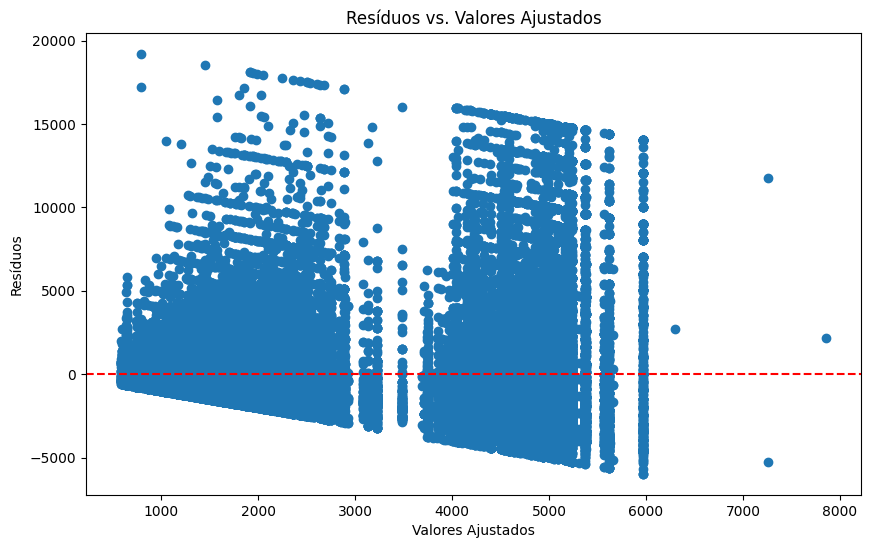

In [205]:
valores_ajustados = results8.fittedvalues
residuos = results8.resid


# Resíduos vs. Valores Ajustados
plt.figure(figsize=(10, 6))
plt.scatter(valores_ajustados, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Ajustados')
plt.show()

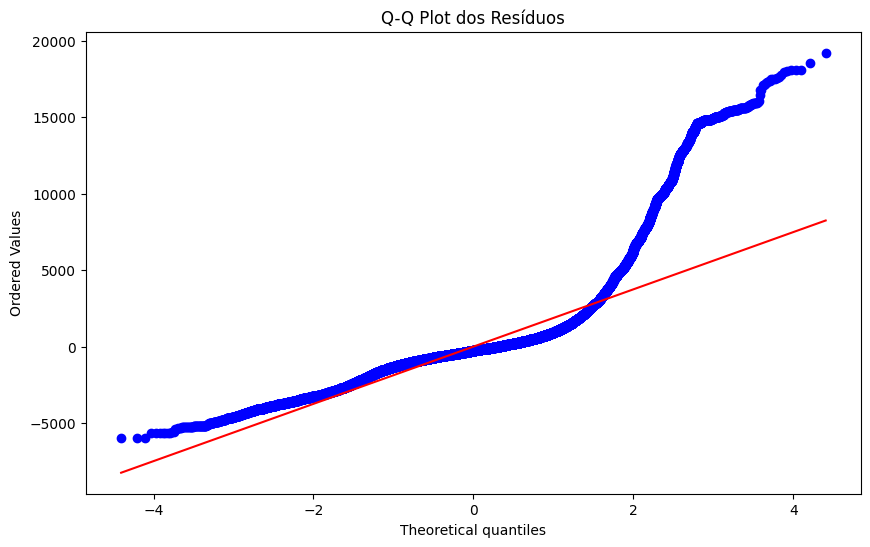

In [206]:
# Plotando o Q-Q plot para verificar a normalidade dos erros
plt.figure(figsize=(10, 6))
probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()